<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/1.Model-Simulation/Reator_bioquimico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas

In [37]:
import numpy as  np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definindo o modelo


In [38]:

def biorreator(t,x,u):

    '''modelo de um biorreator operando em batelada alimentada.'''

    # parametros do modelo
    mu_max = 0.20
    KS = 1.0
    Yxs = 0.5
    Ypx = 0.2

    # variáveis de estado
    X, P, S, V = x

    # variáveis de entrada
    Sf, F = u

    # equações constitutivas
    mu = mu_max*S/(KS+S)
    rg = mu*X
    rp = Ypx*rg

    # equações do modelo
    dV = F
    dX = (V*rg - dV*X)/V
    dP = (V*rp-dV*P)/V
    dS = (F*Sf - V*rg/Yxs - dV*S)/V

    # saida do modelo
    return [dX,dP,dS,dV]

# Especificando as condições


In [39]:
# Variáveis de entrada
Sf0 = 10.0 # Substrato na alimentação
F0 = 0.05 # Vazão de alimentação

# Variáveis de estado
X0 = 0.05
S0 = 10.0
P0 = 0.0
V0 = 1.0

# vetores de condições iniciais
u0 = [Sf0, F0]
x0 = [X0, P0, S0, V0]

# intervalo de integração
tspan = [0, 30.0] # [t_inicial, t_final]

# Simulando o modelo com $F_0=0.05$.


In [40]:
# Instanciar o modelo
modelo = lambda t,x: biorreator(t, x, u0)

# solver: integrador
sol = solve_ivp(modelo, tspan, x0, method='BDF')

# resultado
t = sol.t # tempo
x = sol.y.T # X, S, P, V

# Fazendo nova simulação com $F_0=0.02$.

In [41]:
# nova condição de alimentaçã0
u0_novo = [Sf0, 0.02]

# Instanciar o modelo
modelo = lambda t,x: biorreator(t, x, u0_novo)

# solver: integrador
sol = solve_ivp(modelo, tspan, x0, method='BDF')

# resultado
t_novo = sol.t # tempo
x_novo = sol.y.T # X, S, P, V

# Gerando as saídas gráficas


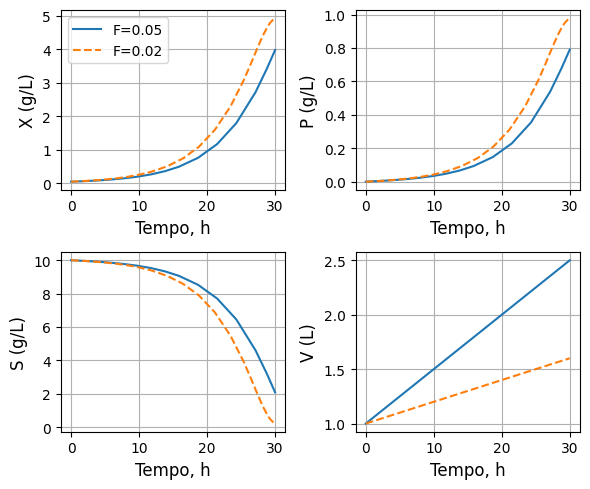

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(6, 5))
labels = [["X (g/L)", "P (g/L)"],
          ["S (g/L)", "V (L)"]]
for i in range(2):
  for j in range(2):
    axs[i, j].plot(t, x[:, i*2+j], '-')
    axs[i, j].plot(t_novo, x_novo[:, i*2+j], '--')
    axs[i, j].set_xlabel('Tempo, h', fontsize=12)
    axs[i, j].set_ylabel(labels[i][j], fontsize=12)
    axs[i, j].grid(True)
axs[0,0].legend(["F=0.05", "F=0.02"])
plt.tight_layout()
plt.show()